# Prequisites

In [491]:
import pandas as pd

In [492]:
test_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Loan Applicants/test_data.csv')
train_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Loan Applicants/train_data.csv')

In [493]:
test_data.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1349,M,No,0,Graduate,No,4843,3806.0,151.0,360.0,1.0,Semiurban
1,1350,M,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban
2,1356,M,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban
3,1357,M,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban
4,1369,M,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban


In [494]:
#test_data.describe()

For now I would just prefer looking at the train data since the test data isn't available to use until the very end to test out the models on but by seeing below we just have 100 values in the training set, I am very interested in seeing how the results will turn out. 

In [495]:
train_data.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1,M,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban
1,2,M,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural
2,3,M,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban
3,4,M,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban
4,5,M,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban


In [496]:
train_data.describe()

,loan_id,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history
count,100.000000,100.00000,100.000000,95.000000,95.000000,92.000000
mean,50.500000,4122.83000,1700.550000,134.221053,341.684211,0.836957
std,29.011492,2258.89434,1947.668891,63.456163,61.309342,0.371429
min,1.000000,1000.00000,0.000000,17.000000,60.000000,0.000000
25%,25.750000,2636.00000,0.000000,99.500000,360.000000,1.000000
50%,50.500000,3598.00000,1558.500000,120.000000,360.000000,1.000000
75%,75.250000,4710.00000,2394.500000,154.500000,360.000000,1.000000
max,100.000000,12841.00000,10968.000000,349.000000,480.000000,1.000000


In [497]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              100 non-null    int64  
 1   gender               99 non-null     object 
 2   marital_status       100 non-null    object 
 3   dependents           100 non-null    object 
 4   qualification        100 non-null    object 
 5   is_self_employed     94 non-null     object 
 6   applicant_income     100 non-null    int64  
 7   co_applicant_income  100 non-null    int64  
 8   loan_amount          95 non-null     float64
 9   loan_amount_term     95 non-null     float64
 10  credit_history       92 non-null     float64
 11  property_area        100 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 9.5+ KB


In [498]:
train_data.isnull().sum().sort_values()

loan_id                0
marital_status         0
dependents             0
qualification          0
applicant_income       0
co_applicant_income    0
property_area          0
gender                 1
loan_amount            5
loan_amount_term       5
is_self_employed       6
credit_history         8
dtype: int64

From a quick summary we see missing values for gender, is_self_employed, loan_amount, loan amount term and credit_history.\
Either those values can be dropped or explore best fits.

In [499]:
train_data.isnull().sum().sort_values()

loan_id                0
marital_status         0
dependents             0
qualification          0
applicant_income       0
co_applicant_income    0
property_area          0
gender                 1
loan_amount            5
loan_amount_term       5
is_self_employed       6
credit_history         8
dtype: int64

In [500]:
train_data[train_data.isnull().any(axis=1)]

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1,M,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban
11,12,M,Yes,2,Graduate,NaN,2500,1840,109.0,360.0,1.0,Urban
16,17,M,No,1,Not Graduate,No,3596,0,100.0,240.0,NaN,Urban
19,20,M,Yes,0,Graduate,NaN,2600,3500,115.0,NaN,1.0,Urban
23,24,NaN,Yes,2,Not Graduate,No,3365,1917,112.0,360.0,0.0,Rural
24,25,M,Yes,1,Graduate,NaN,3717,2925,151.0,360.0,NaN,Semiurban
29,30,F,No,2,Graduate,NaN,3750,2083,120.0,360.0,1.0,Semiurban
30,31,M,Yes,1,Graduate,NaN,4166,3369,201.0,360.0,NaN,Urban
35,36,M,Yes,0,Graduate,No,2275,2067,NaN,360.0,1.0,Urban
36,37,M,Yes,0,Graduate,No,1828,1330,100.0,NaN,0.0,Urban


In [501]:
train_data.columns

Index(['loan_id', 'gender', 'marital_status', 'dependents', 'qualification',
       'is_self_employed', 'applicant_income', 'co_applicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [502]:
for x in train_data.columns:
  print(f'{x}\n{train_data[x].value_counts()}')

loan_id
100    1
37     1
27     1
28     1
29     1
      ..
70     1
71     1
72     1
73     1
1      1
Name: loan_id, Length: 100, dtype: int64
gender
M    84
F    15
Name: gender, dtype: int64
marital_status
Yes    69
No     31
Name: marital_status, dtype: int64
dependents
0     60
2     17
1     15
3+     8
Name: dependents, dtype: int64
qualification
Graduate        77
Not Graduate    23
Name: qualification, dtype: int64
is_self_employed
No     81
Yes    13
Name: is_self_employed, dtype: int64
applicant_income
2500    3
4166    3
3750    3
3200    2
3500    2
       ..
4695    1
9560    1
5849    1
2395    1
5695    1
Name: applicant_income, Length: 88, dtype: int64
co_applicant_income
0       39
2250     2
2336     1
3000     1
1591     1
        ..
2254     1
2253     1
2504     1
4167     1
1086     1
Name: co_applicant_income, Length: 61, dtype: int64
loan_amount
120.0    5
144.0    4
110.0    3
100.0    3
136.0    2
        ..
80.0     1
25.0     1
320.0    1
106.0    1
128

Okay so the output need to be in terms of credit history.

# Visualizing

In [503]:
import seaborn as sns
import matplotlib.pyplot as plt

In [504]:
train_data.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1,M,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban
1,2,M,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural
2,3,M,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban
3,4,M,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban
4,5,M,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban


In [505]:
column_list = train_data.columns

In [506]:
len(column_list)

12

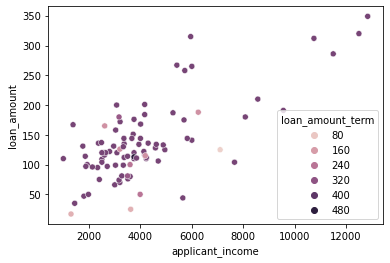

In [507]:
sns.scatterplot(x='applicant_income', y='loan_amount', hue='loan_amount_term', data=train_data)

The applicant income and loan amount have a direct positive correlation.

In [508]:
train_data['loan_amount_term'].value_counts()

360.0    83
180.0     4
300.0     2
240.0     2
120.0     2
480.0     1
60.0      1
Name: loan_amount_term, dtype: int64

There are some potential outliers in the set which might create a problem? possible. will feature in engineer this if needed.\
83% of the people opted in for a 360month loan

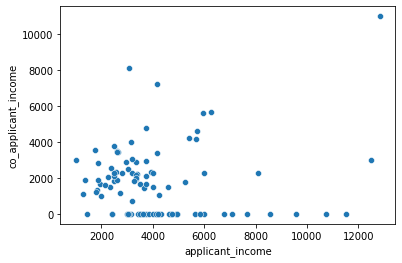

In [509]:
sns.scatterplot(x='applicant_income', y='co_applicant_income', data=train_data)

Co applicant Income shows a similar behaviour but a lot of the values have 0 or no co applicant earnings

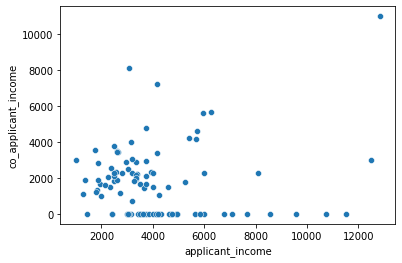

In [510]:
sns.scatterplot(x='applicant_income', y='co_applicant_income', data=train_data)

In [511]:
train_data['co_applicant_income'].value_counts()

0       39
2250     2
2336     1
3000     1
1591     1
        ..
2254     1
2253     1
2504     1
4167     1
1086     1
Name: co_applicant_income, Length: 61, dtype: int64

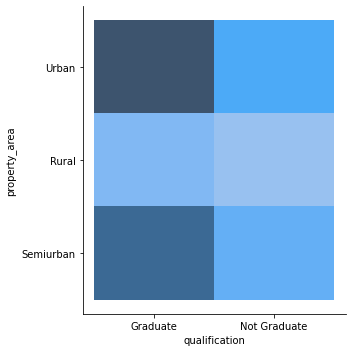

In [512]:
sns.displot(x='qualification', y='property_area', data=train_data)

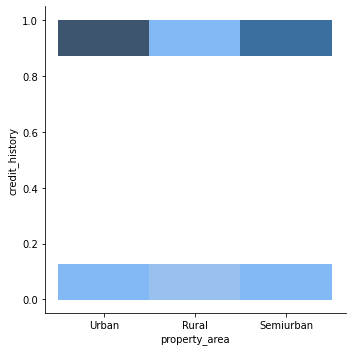

In [513]:
sns.displot(x='property_area', y='credit_history', data=train_data)

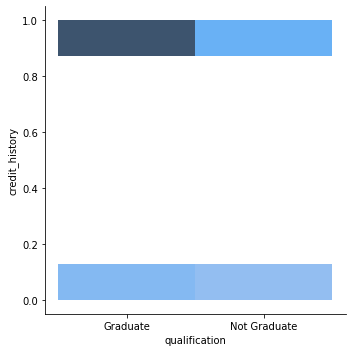

In [514]:
sns.displot(x='qualification', y='credit_history', data=train_data)

In [515]:
train_data.columns

Index(['loan_id', 'gender', 'marital_status', 'dependents', 'qualification',
       'is_self_employed', 'applicant_income', 'co_applicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [516]:
#for x in train_data.columns:
#  sns.relplot(x='credit_history', y=x, data=train_data)

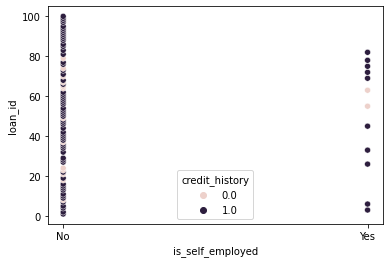

In [517]:
sns.scatterplot(x='is_self_employed', y='loan_id', hue='credit_history', data=train_data)

In [518]:
#train_data = train_data.fillna(round(train_data.mean()))
#train_data['gender'].fillna('M')
#train_data['is_self_employed'].fillna('No')


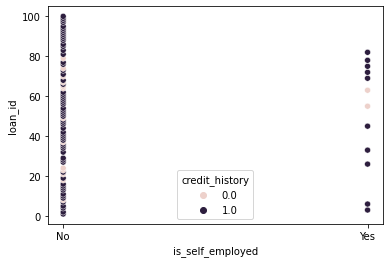

In [519]:
sns.scatterplot(x='is_self_employed', y='loan_id', hue='credit_history', data=train_data)

# Models

In [520]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [521]:
#for x in train_data.columns:
#  print(f'{x}\n{train_data[x].unique()}')

In [522]:
#train_data['gender'].unique()

In [523]:
#print(list(enumerate(train_data['gender'].unique())))

In [524]:
#Train_data = pd.get_dummies(train_data)

In [525]:
Train_data = Train_data.dropna()

In [526]:
train = Train_data.drop('credit_history', axis=1)
test = Train_data['credit_history']

In [527]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 1 to 99
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_id                     83 non-null     int64  
 1   applicant_income            83 non-null     int64  
 2   co_applicant_income         83 non-null     int64  
 3   loan_amount                 83 non-null     float64
 4   loan_amount_term            83 non-null     float64
 5   gender_F                    83 non-null     uint8  
 6   gender_M                    83 non-null     uint8  
 7   marital_status_No           83 non-null     uint8  
 8   marital_status_Yes          83 non-null     uint8  
 9   dependents_0                83 non-null     uint8  
 10  dependents_1                83 non-null     uint8  
 11  dependents_2                83 non-null     uint8  
 12  dependents_3+               83 non-null     uint8  
 13  qualification_Graduate      83 non-nu

In [528]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.35, random_state = 42)
print(f'Training Samples:{len(x_train)}, Testing Samples:{len(x_test)}')

Training Samples:53, Testing Samples:30


In [534]:
Model1 = tree.DecisionTreeClassifier()
Model1 = Model1.fit(x_train, y_train)
Model1.score(x_test, y_test)

0.9333333333333333

In [530]:
#Test_data = pd.get_dummies(test_data).dropna()
Test_data = Test_data.dropna()
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_id                     436 non-null    int64  
 1   applicant_income            436 non-null    int64  
 2   co_applicant_income         436 non-null    float64
 3   loan_amount                 436 non-null    float64
 4   loan_amount_term            436 non-null    float64
 5   credit_history              436 non-null    float64
 6   gender_F                    436 non-null    uint8  
 7   gender_M                    436 non-null    uint8  
 8   marital_status_No           436 non-null    uint8  
 9   marital_status_Yes          436 non-null    uint8  
 10  dependents_0                436 non-null    uint8  
 11  dependents_1                436 non-null    uint8  
 12  dependents_2                436 non-null    uint8  
 13  dependents_3+               436 non

In [531]:
modeltest = Test_data.drop('credit_history', axis=1)
modelscore = Test_data['credit_history']

In [535]:
Model1.score(modeltest, modelscore)

0.8188073394495413